In [119]:
import pandas as pd

from statsmodels.tsa.stattools import adfuller  
from pandas.plotting import autocorrelation_plot

from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima




C:\Users\nikhi\AppData\Local\Temp/ipykernel_18512/3617214361.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [102]:
#Reading file

In [104]:
series= pd.read_csv('upload_DJIA_table.csv', header=0, parse_dates=[0], index_col=[0], squeeze=True)

C:\Users\nikhi\AppData\Local\Temp/ipykernel_18512/2460311468.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series= pd.read_csv('upload_DJIA_table.csv', header=0, parse_dates=[0], index_col=[0], squeeze=True)


In [107]:
#calculationg p value
res = adfuller(series.Open.dropna())  
print('P-value:{}'.format(res[1]))

P-value:0.6220585722348055


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

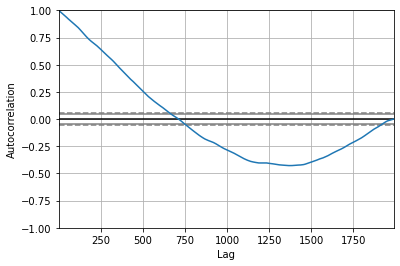

In [108]:
autocorrelation_plot(series["Open"])

In [109]:
# using autoarima to get best predictions
step= auto_arima(series.Open, trace=True)
step.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25322.698, Time=2.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25330.238, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25323.812, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25322.979, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25329.300, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25322.156, Time=2.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=25321.229, Time=1.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=25322.430, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25321.808, Time=1.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25323.942, Time=2.82 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=25320.535, Time=0.81 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=25322.191, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=25321.511, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=25321.679, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1989
Model:               SARIMAX(0, 1, 2)   Log Likelihood              -12657.267
Date:                Fri, 17 Jun 2022   AIC                          25320.535
Time:                        15:02:01   BIC                          25337.319
Sample:                             0   HQIC                         25326.700
                               - 1989                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0658      0.016     -4.232      0.000      -0.096      -0.035
ma.L2         -0.0447      0.013     -3.530      0.000      -0.069      -0.020
sigma2      1.986e+04    366.548     54.171      0.000    1.91e+04    2.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1409.01
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
series.sort_index(inplace=True)


In [114]:
X = series.Open.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # auto arima suggest best model (0,1,2)
    
	model = ARIMA(history, order=(0,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f, diff=%f' % (yhat, obs, yhat-obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes


Test RMSE: 157.716


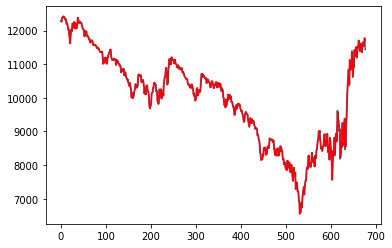

In [115]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()